..............................................................................................................................................................................................................................................................

Projet de Machine Learning : Répartition des aliments dans les groupes alimentaires

..............................................................................................................................................................................................................................................................

Dataset / Base de données : 
- Aliments (100g) associés à leur valeur calorique (kcal) et à leurs macronutriments (glucides, protéines et lipides en g)
- On a 927 éléments pour le TrainSet (80%) et 232 éléments pour le TestSet (20%) soit 1159 éléments pour le DataSet (100%).

Objectifs :
- Répartir les aliments du TrainSet dans les groupes alimentaires et entraîner différents algorithmes.
- Prédire au mieux le groupe des aliments du TestSet à l'aide de modèles.

..............................................................................................................................................................................................................................................................

DataSet

..............................................................................................................................................................................................................................................................

In [1]:
# Importation des librairies classiques
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Récupération du DataSet 
path = "C:/Users/Francky/Desktop/ML/Food_DataSet2.xls"     # Dossier où se trouve le dataSet
sheet_name1 = "DataBase"                                   # Feuille à importer pour le dataSet
dataSet = pd.read_excel(path, sheet_name1)                 # Importation dataSet

In [3]:
# Affichage du DataSet
dataSet.head()

,Groupe Aliments,Sous-Groupe Aliments,Sous-Sous-Groupe Aliments,Nom Aliments,Energie (kcal/100 g),Protéines (g/100 g),Glucides (g/100 g),Lipides (g/100 g)
0,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,"Avocat, pulpe, cru",205.0,1.56,0.83,20.60
1,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,"Bette ou blette, crue",16.4,1.00,1.63,0.50
2,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,"Carotte, crue",40.2,0.63,7.59,0.50
3,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,"Champignon, tout type, cru",21.7,2.37,1.88,0.23
4,"fruits, légumes, légumineuses et oléagineux",légumes,légumes crus,"Chou rouge, cru",30.0,1.13,4.33,0.50


..............................................................................................................................................................................................................................................................

Analyse des données

..............................................................................................................................................................................................................................................................

La première étape consiste à analyser les données. 

Certains groupes ont-ils des particularités permettant de les distinguer ? L'ordinateur va-t-il facilement classer les aliments ?

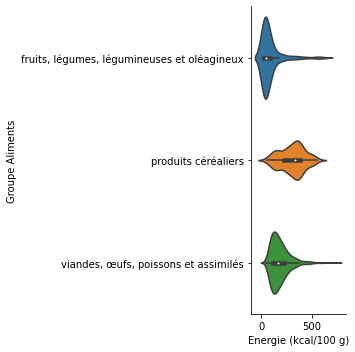

In [4]:
# Affichage Valeur Calorique / Groupe
sns.catplot(x='Energie (kcal/100 g)',y='Groupe Aliments',kind="violin",data=dataSet)

La valeur calorique ne permettra pas de différencier les trois groupes alimentaires.

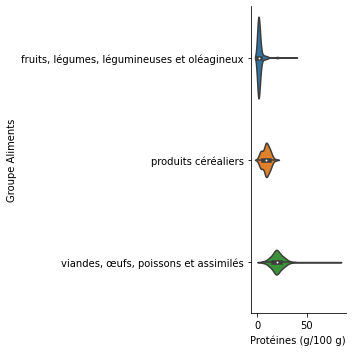

In [5]:
# Affichage Protéines / Groupe
sns.catplot(x='Protéines (g/100 g)',y='Groupe Aliments', kind="violin",data=dataSet)

La teneur en protéines permettra de différencier les trois groupes alimentaires.

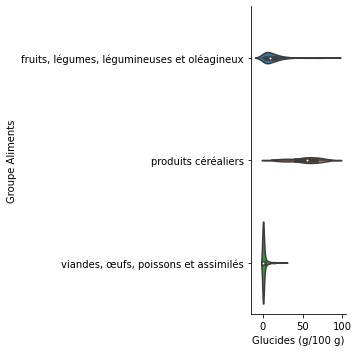

In [6]:
# Affichage Glucides / Catégorie
sns.catplot(x='Glucides (g/100 g)',y='Groupe Aliments', kind="violin",data=dataSet)

La teneur en glucides permettra également de différencier les trois groupes alimentaires.

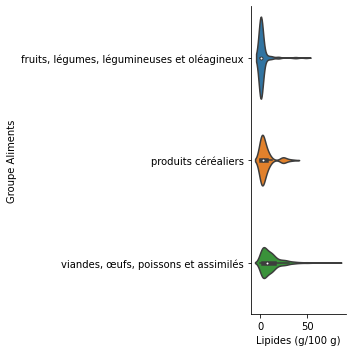

In [7]:
# Affichage Lipides / Catégorie
sns.catplot(x='Lipides (g/100 g)',y='Groupe Aliments', kind="violin",data=dataSet)

La teneur en lipides ne permettra pas de différencier les trois groupes alimentaires.

D'après les graphiques précédents, il paraît plus judicieux d'utiliser la teneur en protéines ainsi que la teneur en glucides pour différencier ces trois groupes alimentaires.
- La teneur en protéines va permettre de différencier la majorité des produits céréaliers et des viandes/oeufs/poissons des fruits/légumes/légumineuses/oléagineux. On obtiendra alors deux groupes.
- La teneur en glucides va ensuite permettre de différencier la majorité des produits céréaliers des viandes/oeufs/poissons/ On obtiendra alors les trois groupes désirés à quelques erreurs près.

..............................................................................................................................................................................................................................................................

Découpage TrainSet / TestSet

..............................................................................................................................................................................................................................................................

In [8]:
# On conserve uniquement les colonnes utiles de la base de données 
dataSet = dataSet[['Groupe Aliments', 'Protéines (g/100 g)', 'Glucides (g/100 g)']]
dataSet.shape

(1159, 3)

In [9]:
# Découpage TrainSet TestSet en 80 % / 20 %
from sklearn.model_selection import train_test_split
X=dataSet[['Protéines (g/100 g)', 'Glucides (g/100 g)']]
Y=dataSet['Groupe Aliments']
TrainSetX, TestSetX, TrainSetY, TestSetY = train_test_split(X,Y,test_size=0.2,random_state=5)

In [10]:
# On vérifie qu'on a 927 valeurs (80%) pour le TrainSet
TrainSetX.shape

(927, 2)

In [11]:
# On vérifie qu'on a 232 valeurs (20%) pour le TestSet
TestSetX.shape

(232, 2)

..............................................................................................................................................................................................................................................................

Algorithmes et modèles

..............................................................................................................................................................................................................................................................

On va maintenant entraîner différents algorithmes et essayer de prédire au mieux les groupes des aliments du TestSet

..............................................................................................................................................................................................................................................................

Algorithme des k-plus proches voisins

Le nombre optimal de voisins est  1
Le score obtenu avec ce nombre de voisins est de  1.0


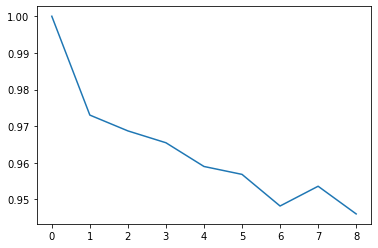

In [12]:
# Détermination du nombre optimal de voisins
from sklearn.neighbors import KNeighborsClassifier
score = []
nombre_voisins = 1
meilleur_score = 0

for n in range(nombre_voisins, 10):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(TrainSetX,TrainSetY)
    score.append(model.score(TrainSetX,TrainSetY))
    
    if meilleur_score < model.score(TrainSetX,TrainSetY):
        nombre_voisins = n
        meilleur_score = model.score(TrainSetX,TrainSetY)

print("Le nombre optimal de voisins est ", nombre_voisins)
print("Le score obtenu avec ce nombre de voisins est de ", meilleur_score)
plt.plot(score)

In [13]:
# Entraînement de l'algorithme des k-plus proches voisins avec l'hyperparamètre optimisé 
model=KNeighborsClassifier(n_neighbors=1) 
model.fit(TrainSetX,TrainSetY)
model.score(TrainSetX,TrainSetY)

1.0

On classe parfaitement les aliments dans les groupes en entraînant cet algorithme donc on peut s'attendre à un résultat satisfaisant pour le test du modèle.

In [14]:
# Évaluation du modèle sur le TestSet
model.score(TestSetX,TestSetY)

0.9698275862068966

On arrive à classer correctement 97 % des aliments avec ce modèle ce qui est satisfaisant et cohérent avec les résultats précédents.

..............................................................................................................................................................................................................................................................

Algorithme des arbres de décisions

La profondeur d'arbre optimale est de  14
Le score obtenu avec cette profondeur d'arbre est de  1.0


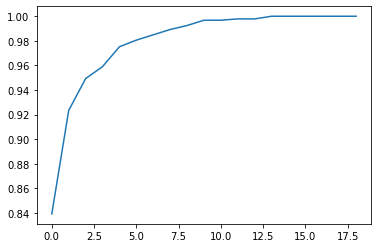

In [15]:
# Détermination de la profondeur optimale de l'arbre
from sklearn.tree import DecisionTreeClassifier, plot_tree
score = []
profondeur_arbre = 1
meilleur_score = 0

for p in range(profondeur_arbre, 20):
    model = DecisionTreeClassifier(max_depth=p) 
    model.fit(TrainSetX,TrainSetY)
    score.append(model.score(TrainSetX,TrainSetY))
    
    if meilleur_score < model.score(TrainSetX,TrainSetY):
        profondeur_arbre = p
        meilleur_score = model.score(TrainSetX,TrainSetY)
        
print("La profondeur d'arbre optimale est de ", profondeur_arbre)
print("Le score obtenu avec cette profondeur d'arbre est de ", meilleur_score)        
plt.plot(score)

In [16]:
# Entraînement de l'algorithme des arbres de décisions avec l'hyperparamètre optimisé
model = DecisionTreeClassifier(max_depth=14) 
model.fit(TrainSetX,TrainSetY)
model.score(TrainSetX,TrainSetY)

1.0

On classe parfaitement les aliments dans les groupes en entraînant cet algorithme donc on peut s'attendre à un résultat satisfaisant pour le test du modèle.

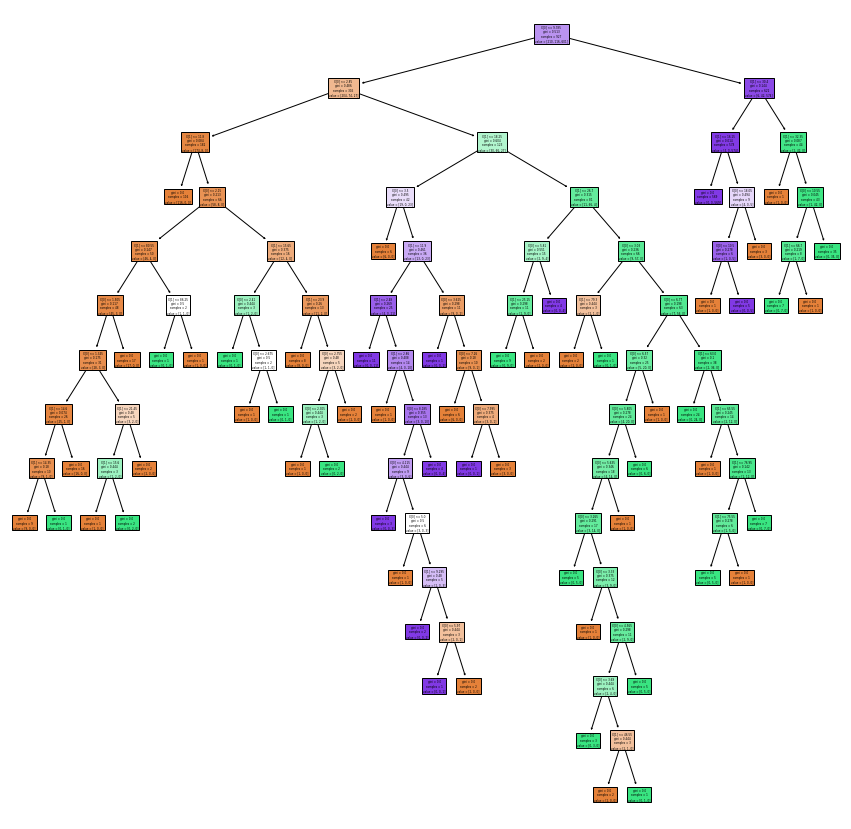

In [17]:
# Affichage de l'arbre de décision
plt.figure(figsize=(15, 15))
plot_tree(model, filled=True)
plt.show()

L'arbre de décision est assez imposant ce qui traduit la difficulté à classer les aliments dans les bons groupes.

On remarque que la profondeur est bien égale à 14.

In [18]:
# Évaluation du modèle sur le TestSet
model.score(TestSetX,TestSetY)

0.9568965517241379

On arrive à classer correctement 95.7 % des aliments avec ce modèle ce qui est satisfaisant et cohérent avec les résultats précédents.

..............................................................................................................................................................................................................................................................

Algorithme de régression logistique

In [19]:
# Entraînement de l'algorithme de régression logistique  
from sklearn.linear_model import LogisticRegression
# Le solveur le plus courant pour un problème à plusieurs dimensions est le solveur 'newton-cg'
# Remarque : les autres solveurs (lbfgs,sag,saga) donnent le même score.
LR=LogisticRegression(solver='newton-cg')
LR.fit(TrainSetX,TrainSetY)
LR.score(TrainSetX,TrainSetY)

0.9352750809061489

On classe plutôt bien les aliments dans les groupes en entraînant cet algorithme même si ce n'est pas parfait (95.7%). On peut donc s'attendre à un résultat assez satisfaisant pour le test du modèle.

In [20]:
# Évaluation du modèle sur le TestSet
LR.score(TestSetX,TestSetY)

0.9698275862068966

On arrive à classer correctement 97 % des aliments avec ce modèle ce qui est satisfaisant et plutôt surprenant car ce score est supérieur à celui obtenu lors de l'entraînement de l'algorithme.

..............................................................................................................................................................................................................................................................

Conclusion

..............................................................................................................................................................................................................................................................

Les trois algorithmes utilisés donnent des résultats satisfaisants / des modèles performants :

- Algorithme des k-plus proches voisins (Entraînement 100 %, Test 97 %)
- Algorithme des arbres de décisions (Entraînement 100 %, Test 95.7 %)
- Algorithme de régression logistique (Entraînement 93.5 %, Test 97%)

D'autres algorithmes (k-moyens, Support Vecteur Machine, etc.) pourraient peut-être produire de meilleurs modèles, mais globalement les aliments ont été correctement classés par les trois modèles à quelques erreurs près.

Ce projet démontre bien les possibilités du machine learning (ici supervisé) car les données ne permettent pas de classer facilement les aliments et il y a fort à parier qu'un humain n'aurait probablement pas fait mieux en davantage de temps.






..............................................................................................................................................................................................................................................................